# Working with complicated dataset

Your name: Mohammad Othman

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [2]:
import pandas as pd

# URL to the CSV file
url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv'

# Read the CSV file while skipping comment lines
data = pd.read_csv(url, comment='#')

# Define the columns based on the fields list in the comment line
fields = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches',
          'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score',
          '% positives', 'bonds', 'publications', 'extra']

# Assign the correct headers to the DataFrame
data.columns = fields

# Drop the first column 'query acc.ver'
data = data.drop(columns=['query acc.ver'])

# Set 'subject acc.ver' as the index
data.set_index('subject acc.ver', inplace=True)

# Show the first 5 rows of the resulting DataFrame
print(data.head())


                 % identity  alignment length  mismatches  gap opens  \
subject acc.ver                                                        
NP_904328.1         100.000               318           0          0   
AGK29621.1           99.686               318           1          0   
YP_220563.1          99.686               318           1          0   
ACM24502.1           99.686               318           1          0   
AHG32084.1           99.371               318           2          0   

                 q. start  q. end  s. start  s. end  evalue  bit score  \
subject acc.ver                                                          
NP_904328.1             1     318         1     318       0        629   
AGK29621.1              1     318         1     318       0        629   
YP_220563.1             1     318         1     318       0        627   
ACM24502.1              1     318         1     318       0        627   
AHG32084.1              1     318         1     318

### Question 2
What is the average number of publications?

In [3]:
# Convert the 'publications' column to numeric values, handling any non-numeric entries
data['publications'] = pd.to_numeric(data['publications'], errors='coerce')

# Calculate the average number of publications
average_publications = data['publications'].mean()

# Output the result
print(f"The average number of publications is: {average_publications}")


The average number of publications is: 26.989690721649485


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [4]:
# Convert the 'bonds' column to numeric values, handling any non-numeric entries
data['bonds'] = pd.to_numeric(data['bonds'], errors='coerce')

# Filter the rows where 'bonds' is greater than 15,000
filtered_data = data[data['bonds'] > 15000]

# Display the 'subject acc.ver' of the filtered rows
subject_acc_ver_over_15000_bonds = filtered_data.index

# Output the result
print("Subjects with more than 15,000 bonds:")
print(subject_acc_ver_over_15000_bonds)


Subjects with more than 15,000 bonds:
Index([], dtype='object', name='subject acc.ver')


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

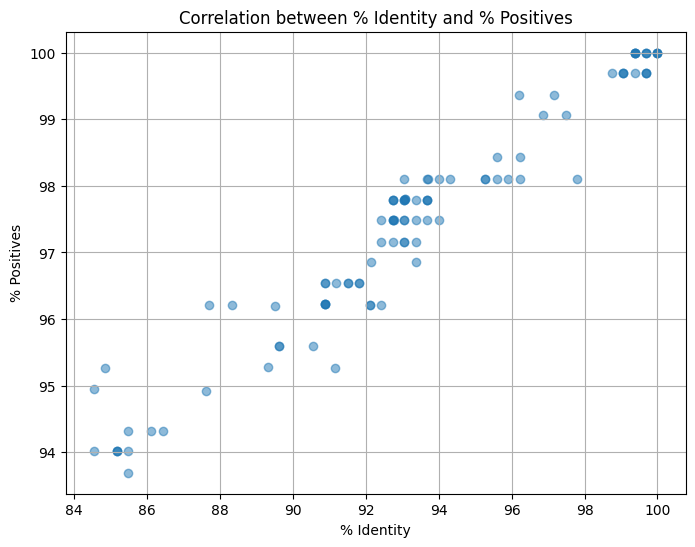

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# URL to the CSV file
url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv'

# Read the CSV file while skipping comment lines
data = pd.read_csv(url, comment='#')

# Define the columns based on the fields list in the comment line
fields = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches',
          'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score',
          '% positives', 'bonds', 'publications', 'extra']

# Assign the correct headers to the DataFrame
data.columns = fields

# Drop the first column 'query acc.ver'
data = data.drop(columns=['query acc.ver'])

# Set 'subject acc.ver' as the index
data.set_index('subject acc.ver', inplace=True)

# Convert the relevant columns to numeric values, handling any non-numeric entries
data['% identity'] = pd.to_numeric(data['% identity'], errors='coerce')
data['% positives'] = pd.to_numeric(data['% positives'], errors='coerce')

# Plotting the correlation between % identity and % positives
plt.figure(figsize=(8, 6))
plt.scatter(data['% identity'], data['% positives'], alpha=0.5)
plt.title('Correlation between % Identity and % Positives')
plt.xlabel('% Identity')
plt.ylabel('% Positives')
plt.grid(True)
plt.show()


### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [7]:
import pandas as pd

# URLs for the two CSV files
blast_results_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv'
protein_source_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv'

# Read the blast results CSV while skipping comment lines
blast_data = pd.read_csv(blast_results_url, comment='#')

# Define the correct number of columns based on the data (16 columns)
fields = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches',
          'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score',
          '% positives', 'bonds', 'publications', 'extra_column']

# Assign the correct headers to the blast data
blast_data.columns = fields

# Drop the 'query acc.ver' column
blast_data = blast_data.drop(columns=['query acc.ver'])

# Set the 'subject acc.ver' as the index
blast_data.set_index('subject acc.ver', inplace=True)

# Read the protein source CSV
protein_source_data = pd.read_csv(protein_source_url)

# Merge the dataframes based on 'subject acc.ver' and 'Protein'
merged_data = blast_data.merge(protein_source_data[['Protein', 'Source']], left_index=True, right_on='Protein', how='left')

# Rename the 'Source' column to 'Protein source'
merged_data.rename(columns={'Source': 'Protein source'}, inplace=True)

# Show the first few rows of the resulting dataframe
print(merged_data.head())


     % identity  alignment length  mismatches  gap opens  q. start  q. end  \
0.0     100.000               318           0          0         1     318   
NaN      99.686               318           1          0         1     318   
1.0      99.686               318           1          0         1     318   
NaN      99.686               318           1          0         1     318   
NaN      99.371               318           2          0         1     318   

     s. start  s. end  evalue  bit score  % positives     bonds publications  \
0.0         1     318       0        629       100.00    1,487             9   
NaN         1     318       0        629       100.00   17,947            47   
1.0         1     318       0        627       100.00   12,106            13   
NaN         1     318       0        627        99.69    2,319            41   
NaN         1     318       0        627       100.00   18,964             3   

    extra_column      Protein Protein source  
0.0